In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel as krnl
from deflected_subgradient import solveDeflected
from SVR import SVR
from svr_grid_search import Gridsearch
import matplotlib.pyplot as plt
import random
import copy
from sklearn.metrics import r2_score

In [2]:
def create_kernel(x, kernel, coef, degree, gamma):
    # interface function to get the desired kernel output
    if kernel == 'linear':
        return krnl.linear(x, x)
    elif kernel == 'rbf':
        return krnl.rbf(x, x, gamma)
    elif kernel == 'poly':
        print('hello')
        return krnl.poly(x, x, gamma, degree, coef)
    elif kernel == 'sigmoid':
        return krnl.sigmoid(x, x, gamma, coef)

# method to get the fstar of a sklearn svr model
def sklearn_fstar(x, y, sklearn_model):
    # create a correct betas array, filling with zeros where needed
    betas = np.zeros(sklearn_model.shape_fit_[0])
    dual_coef_iter = 0
    for i in range(sklearn_model.shape_fit_[0]):
        if i in sklearn_model.support_:
            betas[i] = sklearn_model.dual_coef_[0][dual_coef_iter]
            dual_coef_iter += 1
        else:
            betas[i] = 0.0
    betas = np.vstack(betas)
    
    # create kernel
    K = create_kernel(x, sklearn_model.kernel, sklearn_model.coef0, sklearn_model.degree, sklearn_model.gamma)[0]
    
    # calculate as in below formula
    fstar = (0.5 * np.dot(np.dot(np.transpose(betas), K), betas) 
            + sklearn_model.epsilon * np.sum(np.abs(betas))
            - np.transpose(y).dot(betas))
    return fstar
    

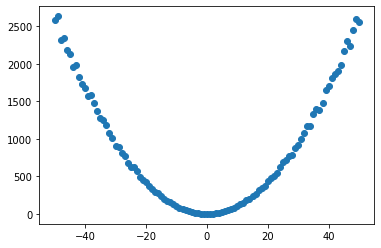

In [21]:
x = np.vstack(np.arange(-50,51,1))
degree = 2
noising_factor = 0.1
y = [xi**degree for xi in x]
y = [ yi + noising_factor * (np.random.rand()*yi) for yi in y]
y=np.array(y, dtype=np.float64)
plt.scatter(x,y)
plt.show()

In [4]:
tr_x, val_x = x[:len(x)-len(x)//5], x[len(x)-len(x)//5:]
tr_y, val_y = y[:len(y)-len(y)//5], y[len(y)-len(y)//5:]
gs = Gridsearch()
gs.set_parameters(
    kernel=["poly", "poly"],
    kparam=[{"degree":2, "gamma":1},{"degree":3, "gamma":1}],
    box=[0.1,1,10],
    eps=[0.05,0.1,0.5],
    optiargs=[{'eps':1e-2, 'maxiter':3e3}, {'eps':1e-2, 'maxiter':5e3}, {'eps':1e-2, 'maxiter':10e3}]
)
best_coarse_model = gs.run(
    tr_x, tr_y, val_x, val_y
)

print("BEST COARSE GRID SEARCH MODEL:",best_coarse_model)

svr = best_coarse_model
kernel, kparam, optiargs, eps, box  = gs.get_model_perturbations(best_coarse_model, 10, 6)
print(kernel, kparam, optiargs)
gs.set_parameters(
    eps=eps,
    box=box,
    kernel=kernel,
    kparam=kparam,
    optiargs=optiargs
)
best_fine_model = gs.run(
    x, y, val_x, val_y
)
print("BEST FINE GRID SEARCH MODEL:", best_fine_model)

svr = best_fine_model
pred = [float(svr.predict(x[i])) for i in range(x.shape[0])]
print("T LOSS:", svr.eps_ins_loss(y, pred))

pred = [float(svr.predict(val_x[i])) for i in range(val_x.shape[0])]
print("V LOSS:", svr.eps_ins_loss(val_y, pred))

(GS - SVR) - Creating models
(GS - SVR) - Fitting 54 models
(GS - SVR) - model 1/54
Fit time: 4.919037580490112, #SV: 81
	(GS - SVR) - Time taken: 4.919037580490112 - Remaining: 260.70899176597595
(GS - SVR) - model 2/54
Fit time: 8.203962564468384, #SV: 81
	(GS - SVR) - Time taken: 13.123000144958496 - Remaining: 341.1980037689209
(GS - SVR) - model 3/54
Fit time: 16.45900297164917, #SV: 81
	(GS - SVR) - Time taken: 29.582003116607666 - Remaining: 502.8940529823303
(GS - SVR) - model 4/54
Fit time: 5.021000146865845, #SV: 81
	(GS - SVR) - Time taken: 34.60300326347351 - Remaining: 432.5375407934189
(GS - SVR) - model 5/54
Fit time: 8.361050605773926, #SV: 81
	(GS - SVR) - Time taken: 42.96405386924744 - Remaining: 421.0477279186249
(GS - SVR) - model 6/54
Fit time: 16.21500039100647, #SV: 81
	(GS - SVR) - Time taken: 59.179054260253906 - Remaining: 473.43243408203125
(GS - SVR) - model 7/54
Fit time: 4.925999879837036, #SV: 81
	(GS - SVR) - Time taken: 64.10505414009094 - Remaining: 4

(GS - SVR) - Fitting 60 models
(GS - SVR) - model 1/60
Fit time: 30.27346444129944, #SV: 101
	(GS - SVR) - Time taken: 30.27346444129944 - Remaining: 1786.1344020366669
(GS - SVR) - model 2/60
Fit time: 30.144774436950684, #SV: 101
	(GS - SVR) - Time taken: 60.41923379898071 - Remaining: 1752.1577801704407
(GS - SVR) - model 3/60
Fit time: 30.39095139503479, #SV: 101
	(GS - SVR) - Time taken: 90.8101851940155 - Remaining: 1725.3935186862946
(GS - SVR) - model 4/60
Fit time: 30.550005674362183, #SV: 101
	(GS - SVR) - Time taken: 121.36019086837769 - Remaining: 1699.0426721572876
(GS - SVR) - model 5/60
Fit time: 30.95899510383606, #SV: 101
	(GS - SVR) - Time taken: 152.31918597221375 - Remaining: 1675.5110456943512
(GS - SVR) - model 6/60
Fit time: 30.369664430618286, #SV: 101
	(GS - SVR) - Time taken: 182.68885040283203 - Remaining: 1644.1996536254883
(GS - SVR) - model 7/60
Fit time: 29.39199471473694, #SV: 101
	(GS - SVR) - Time taken: 212.0818452835083 - Remaining: 1605.762542860848

Fit time: 29.74747323989868, #SV: 100
	(GS - SVR) - Time taken: 1802.9955124855042 - Remaining: 0.0
(GS - SVR) - Evaluating models
(GS - SVR) - SVR: 0 - TR MEE 330.3595181437 - VL MEE 413.20731394263873 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [430.88752799]\Optim_args: {'eps': 0.01, 'maxiter': 10000.0, 'vareps': 0.05}
Box: 10

(GS - SVR) - SVR: 1 - TR MEE 672.8746815645895 - VL MEE 848.519421924679 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [-871.44122184]\Optim_args: {'eps': 0.03907464387042387, 'maxiter': 10000.0, 'vareps': 0.1}
Box: 10

(GS - SVR) - SVR: 2 - TR MEE 8421.119960725771 - VL MEE 10597.899515432286 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [10943.32027998]\Optim_args: {'eps': 0.08712310620289591, 'maxiter': 10000.0, 'vareps': 0.1}
Box: 10

(GS - SVR) - SVR: 3 - TR MEE 2942.92472524024 - VL MEE 3702.610904374924 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [3826.14320725]\Optim_args: {'eps': 0.07458

BEST FINE GRID SEARCH MODEL: 
Kernel: poly
Gamma: 0.800788640923003	Degree: 2	Coef: 0.2678352937490496
Intercept: [45.62539649]\Optim_args: {'eps': 0.07458998144451232, 'maxiter': 10000.0, 'vareps': 0.1}
Box: 10
T LOSS: [227639.95975151]
V LOSS: [82689.63252436]


In [22]:
import time
start = time.time()
svr = SVR("poly", {"degree":degree, "gamma": 0.800788640923003, 'coef': 0.2678352937490496}, box=10)
svr.fit(x, y, {'eps': 0.07458998144451232, 'maxiter': 10000.0, 'vareps': 0.1}, optim_verbose=False)
print(f"elapsed time {time.time() - start}")

Fit time: 32.88699531555176, #SV: 101
elapsed time 32.893996238708496


b: [-30240.29297281]
Gamma: 0.800788640923003 - Box: 10
PREDICTION (INPUT = 12) [[-24965.24592864]]
LOSS: [7.38685773e+10]


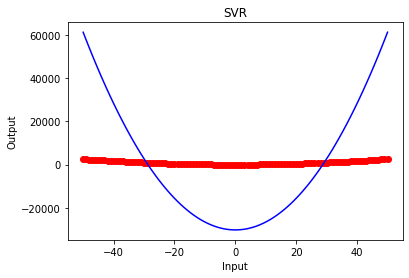

-1148.6459426605697

In [23]:
to_predict = 12
pred = svr.predict(to_predict)
print(f"b: {svr.intercept}")
print(f"Gamma: {svr.gamma_value} - Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(y, pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()
r2_score(y, pred)

elapsed time 0.014971017837524414
 b: [-257.92647512]
Gamma: 0.800788640923003 - Box: 10
PREDICTION (INPUT = 12) [-69.05913698]


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


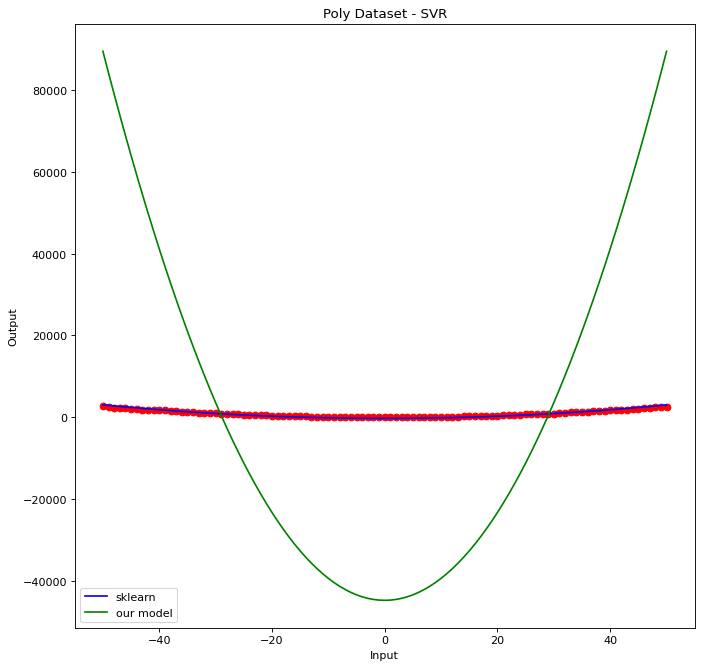

0.9358109086870192

In [20]:
import sklearn.svm as ss
import time
start = time.time()
regressor = ss.SVR(kernel = 'poly', C=10, epsilon=0.1, degree=degree, gamma=0.800788640923003, max_iter=1e4, coef0=0.2678352937490496)

xs = x
ys = y
regressor.fit(xs, ys.ravel())
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(np.array([[to_predict]]))
print(f" b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
print(f'PREDICTION (INPUT = {to_predict})', y_pred)

sklearn_predict = regressor.predict(x)
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)
plt.scatter(x, y, color = 'red')
plt.plot(x, sklearn_predict, color = 'blue', label='sklearn')
plt.plot(x, pred, color = 'green', label='our model')
plt.title('Poly Dataset - SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
r2_score(y, sklearn_predict)

In [19]:
print("eps:",regressor.epsilon)
print("b:",regressor.intercept_)
params = regressor.get_params()
print("gamma:",params['gamma'])
print("C:",params['C'])
print("sv:",regressor.support_vectors_)
print("supp index:",regressor.support_)

eps: 0.05
b: [46.71193953]
gamma: 0.9676294752361521
C: 10
sv: [[-50.]
 [-49.]
 [-48.]
 [-46.]
 [-43.]
 [-42.]
 [-41.]
 [-40.]
 [-24.]
 [ -8.]
 [ -2.]
 [ -1.]
 [  0.]
 [  1.]
 [ 40.]
 [ 41.]
 [ 44.]
 [ 46.]
 [ 49.]
 [ 50.]]
supp index: [  0   1   2   4   7   8   9  10  26  42  48  49  50  51  90  91  94  96
  99 100]


In [21]:
regressor.epsilon

0.05

In [22]:
regressor.get_params()

{'C': 10,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 2,
 'epsilon': 0.05,
 'gamma': 1,
 'kernel': 'poly',
 'max_iter': 1000.0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
regressor.dual_coef_

array([[ 1.00000000e+01,  1.00000000e+01, -1.69247565e-01,
        -1.00000000e+01,  7.34295825e-01, -4.31274708e-01,
        -1.00000000e+01, -2.94029132e+00, -1.32766103e-03,
        -5.11755893e-01, -2.82888651e+00, -1.32104706e+00,
         9.15097412e-01,  3.74791971e+00,  2.94029132e+00,
         1.00000000e+01, -3.03021117e-01,  1.00000000e+01,
        -1.00000000e+01, -9.83075243e+00]])

In [12]:
sklearn_fstar(x, y, regressor), svr.history['fstar']

hello


(array([[-16161.34151776]]), -676.878846688403)